In [1]:
import numpy as np

In [2]:
class Mullayer:
    def __init__(self):
        # 逆伝播の時のために、ここに順伝播で使った数値x, yを格納
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

In [3]:
apple = 100
apple_num = 2
tax = 1.1

# layer
mul_apple_layer = Mullayer()
mul_tax_layer = Mullayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print("forward cal: ", price)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

# print("dapple_price: ", dapple_price)
print("dapple: ", dapple)
print("dapple_num: ", dapple_num)
print("dtax: ", dtax)


forward cal:  220.00000000000003
dapple:  2.2
dapple_num:  110.00000000000001
dtax:  200


In [4]:
class AddLayer:
    def __init__(self):
        pass # 逆伝播時にただdout通すだけだからx,yを格納する必要がない

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy


In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = Mullayer()
mul_orange_layer = Mullayer()
add_apple_orange = AddLayer()
mul_tax_layer = Mullayer()

# forward
apple_price = mul_apple_layer.forward(apple,apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

print("forward cal: ", price)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("dapple_num: ", dapple_num)
print("dapple: ", dapple)
print("dorange: ", dorange)
print("dorange_num: ", dorange_num)
print("dtax: ", dtax)

forward cal:  715.0000000000001
dapple_num:  110.00000000000001
dapple:  2.2
dorange:  3.3000000000000003
dorange_num:  165.0
dtax:  650


In [6]:
class Relu:
    def __init__(self):
        self.mask = None #逆伝播の時のために、ここに順伝播で使ったmaskを格納

    def forward(self, x):
        self.mask = (x <= 0) # x<=0のxはTrue, それ以外はFalseをmaskに格納
        out = x.copy() # outにxの数値をコピー
        out[self.mask] = 0 #True（x<=0）の数値は0にする

        return out

    def backward(self, dout):
        dout[self.mask] = 0 #True（x<=0）の数値は0にする
        dx = dout

        return dx

In [7]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
mask = (x <= 0)
print("mask:")
print(mask)

out = x.copy() # outにxの数値をコピー
print("out:")
print(out)

print("True(x<=0)の数値: ", out[mask])

out[mask] = 0 #True（x<=0）の数値は0にする
print("x<=0を0に変換した後:")
print(out)

mask:
[[False  True]
 [ True False]]
out:
[[ 1.  -0.5]
 [-2.   3. ]]
True(x<=0)の数値:  [-0.5 -2. ]
x<=0を0に変換した後:
[[1. 0.]
 [0. 3.]]


In [8]:
class sigmoid:
    def __init__(self):
        self.out = None #逆伝播の時のために、ここに順伝播で使ったoutを格納

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


In [9]:
X = np.random.rand(2)
W = np.random.rand(2, 3)
B = np.random.rand(3)

print(X.shape)
print(W.shape)
print(B.shape)

# Affine
Y = np.dot(X,W)
print(Y.shape)

(2,)
(2, 3)
(3,)
(3,)


In [10]:
# Affine(np.dot(X, W) + b)
#forward
print("forwardでのdot(X,W)に対するbの加算法:")
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]]) #np.dot(X,W)の結果1,2
B = np.array([1, 2, 3])

print(X_dot_W)
print(X_dot_W + B) #np.dot(X,W)の結果1,2それぞれにbを加算

#backward
print("backwardでのdbのの求め方:")
#dY(N,3) N:データ数, 3: 要素数
dY = np.array([[1,2,3], [4,5,6]]) #np.dot(X,W)の結果y1,y2に対する微分
print(dY)
dB = np.sum(dY, axis=0) #dY(.shape(2,3))から流すだけだがデータが複数あるので縦軸で値をまとめる→b.shape(3,)だから
print(dB)

forwardでのdot(X,W)に対するbの加算法:
[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]
backwardでのdbのの求め方:
[[1 2 3]
 [4 5 6]]
[5 7 9]


In [11]:
class Affine:
    def __init__(self, W, b):
        self.W = W # 一回の試行中(更新されるまで)何度もAffineレイヤーが使用され、同じWが使われる
        self.b = b #　一回の試行中(更新されるまで)何度もAffineレイヤーが使用され、同じbが使われる
        self.x = None
        self.dW = None #Affineクラスで勾配が格納され更新される
        self.db = None #Affineクラスで勾配が格納され更新される

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        return dx

In [12]:
import os, sys
os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch04")
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from common.functions import softmax, cross_entropy_error, sigmoid, sigmoid_grad

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x ,t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1): #ここではdoutが１だから実質コード上にいらないが明示されている
        batch_size = self.t.shape[0]
        dx = (self.y -self.t) / batch_size

        return dx

In [13]:
import numpy as np
import os, sys

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch04")
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error, sigmoid, sigmoid_grad
from common.gradient import numerical_gradient
from common.layers import Relu, Sigmoid, Affine, SoftmaxWithLoss
from collections import OrderedDict

class TwoLayerNet_v3:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x


    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t) #SoftmaxWithLossのforward計算（損失計算）

    # 逆伝播を使った勾配計算
    # numerical_gradient_multiDim & Allnumerical_gradientsより高速に勾配が求められる(backward propagationが組み込まれているから)
    def gradient(self, x, t):
        # forward
        self.loss(x,t) #まず損失計算されることでSoftmaxWithLossクラス内のself.yとself.tが格納される（backwardで使われる）

        #backward
        dout = 1
        dout = self.lastLayer.backward(dout) #self.yとself.tを使って計算
        # 残りのレイヤーを逆順で逆伝播計算し、その際に各Affineレイヤー内の勾配(dW,db)が計算されていく
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        #各Affineレイヤー内で計算された勾配を勾配の辞書に格納（あとでW,bの更新に使用）
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) #行における最大値のインデックスの取得（１次元配列）
        # 正解ラベルがゼロワンデータだった場合（多次元配列）（もともと1次元の場合は0-9で直接答えが書かれている１次元配列）
        if t.ndim != 1 : t = np.argmax(t, axis=1) #各行における最大値のインデックスを取得（１次元配列に変換）

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

######################################################################################################

    def numerical_gradient_multiDim(
        self, f, x
    ):  # fは扱う変数、xは求めたい微分の変数←from common.gradient import numerical_gradientと同様
        h = 1e-4
        grad = np.zeros_like(x)

        # np.nditerを使用して多次元配列の各要素を反復処理する
        it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
        while not it.finished:
            idx = it.multi_index  # 現在の要素のインデックスをタプルとして取得
            tmp_val = x[idx]  # 現在の要素の値を一時的に保存

            x[idx] = tmp_val + h  # 現在の要素にhを加える
            fxh1 = f(x)  # f(x + h)を評価

            x[idx] = tmp_val - h  # 現在の要素からhを引く
            fxh2 = f(x)  # f(x - h)を評価

            grad[idx] = (fxh1 - fxh2) / (2 * h)  # 数値微分を計算
            x[idx] = tmp_val  # 元の値に戻す

            it.iternext()  # 次の要素に移動

        return grad

    # 前回はnumerical_gradient_multiDim(f, x)に対して、関数外で損失関数fと求めたい偏微分の変数を入力したが、
    # 今回はAllnumerical_gradients()内ですべてまとめる
    # また求めたい偏微分の変数ｆ(W)の代わりに入力データxと正解ラベルtが引数になっている(関数loss_Wの計算をするため)
    def Allnumerical_gradients(self, x, t):
        loss_W = lambda W: self.loss(
            x, t
        )  # 損失関数の定義（この関数内でx,W,bを使ってyを出力(予測)、tと照らし合わせて損失が計算されている）
        grads = {}
        # それぞれの変数における任意の値に対する偏微分（接線の傾き）を求める
        grads["W1"] = self.numerical_gradient_multiDim(loss_W, self.params["W1"])
        grads["b1"] = self.numerical_gradient_multiDim(loss_W, self.params["b1"])
        grads["W2"] = self.numerical_gradient_multiDim(loss_W, self.params["W2"])
        grads["b2"] = self.numerical_gradient_multiDim(loss_W, self.params["b2"])

        return grads

In [14]:
#勾配確認（数値微分と誤差逆伝播法における結果の比較）
import numpy as np
import matplotlib.pyplot as plt
import os, sys

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch05")
sys.path.append(os.pardir)

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet_v3(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.Allnumerical_gradients(x_batch, t_batch)
print(grad_numerical)
grad_backprop = network.gradient(x_batch, t_batch)
print(grad_backprop)

for key in grad_numerical.keys():
    #各重みの差の絶対値における平均値
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

{'W1': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'b1': array([-8.58360418e-04,  0.00000000e+00, -1.14626764e-04, -2.80649419e-03,
       -3.23278662e-04, -2.21069314e-04, -2.45766430e-03,  1.20431703e-03,
       -1.48695864e-03,  0.00000000e+00,  1.58736341e-03, -3.45777440e-04,
        4.71472414e-03, -4.20217440e-03,  0.00000000e+00, -1.51289560e-03,
        0.00000000e+00,  0.00000000e+00,  8.67993941e-04,  5.92416856e-03,
        0.00000000e+00, -1.44351312e-03, -9.35619727e-03,  4.31156794e-03,
       -2.05915847e-04,  0.00000000e+00,  1.61578106e-05, -2.87398582e-03,
        0.00000000e+00,  8.24444388e-04,  0.00000000e+00, -3.11810914e-03,
        3.35363836e-03,  1.52434607e-03,  1.19414468e-03,  8.25567277e-04,
       -5.16994918e-03,  1.22606447e-03,  0.00000000e+00,  0.00000000e

train acc, test acc | 0.09851666666666667, 0.0936
train acc, test acc | 0.90465, 0.9072
train acc, test acc | 0.9232, 0.9271
train acc, test acc | 0.93875, 0.938
train acc, test acc | 0.9485166666666667, 0.9465
train acc, test acc | 0.9532666666666667, 0.9493
train acc, test acc | 0.9584666666666667, 0.9533
train acc, test acc | 0.9612666666666667, 0.9568
train acc, test acc | 0.96435, 0.9589
train acc, test acc | 0.96665, 0.9606
train acc, test acc | 0.9696166666666667, 0.9616
train acc, test acc | 0.9714166666666667, 0.9624
train acc, test acc | 0.9734833333333334, 0.9662
train acc, test acc | 0.9753, 0.9661
train acc, test acc | 0.9759666666666666, 0.965
train acc, test acc | 0.9780833333333333, 0.9681
train acc, test acc | 0.9797666666666667, 0.969


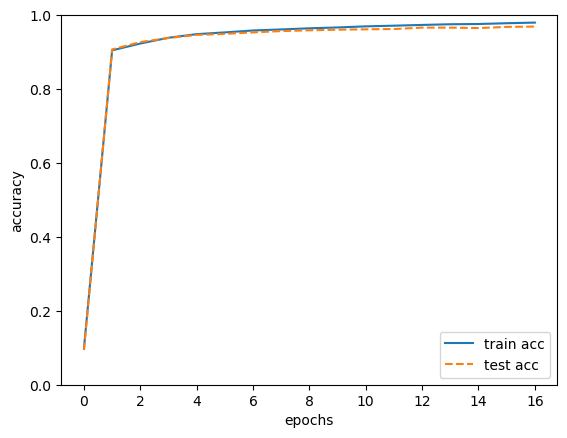

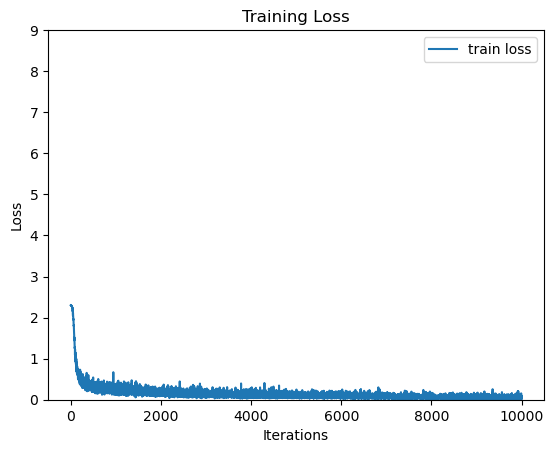

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch04")
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# ハイパーパラメーター
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet_v3(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # train_sizeからbatch_size分ランダム選択（インデックス）
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 求めたい微分の変数がh分変化した時、ランダム選択された100個のサンプルの損失平均の変化量（偏微分||接線の傾き）たち（勾配）
    # grad = network.Allnumerical_gradients(x_batch, t_batch) # 数値微分による勾配計算（遅い）
    grads = network.gradient(x_batch, t_batch)  # back propagationを使った高速版
    # それぞれのパラメーターをアップデート
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grads[key]

    # 1バッチ（100個の損失平均）ごとの記録
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    # print("loss per batch | " + str(loss))

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# モデルの正確度推移
markers = {"train": "o", "test": "s"}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label="train acc")
plt.plot(x, test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

# モデルの損失推移
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="train loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.ylim(0, 9)
plt.title("Training Loss")
plt.legend()
plt.show()